# Problem Set 0: Images as Functions


## Imports

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2 as cv

## Question 1 - Input images

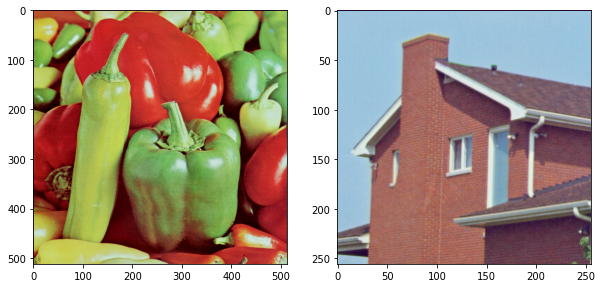

In [5]:
image_1 = cv.imread("output/ps0-1-a-1.png", cv.IMREAD_COLOR)
image_1 = cv.cvtColor(image_1, cv.COLOR_BGR2RGB)

image_2 = cv.imread("output/ps0-1-a-2.png", cv.IMREAD_COLOR)
image_2 = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(ncols=2, figsize=(10, 10), facecolor="white")
axs[0].imshow(image_1)
axs[1].imshow(image_2)
plt.show()

## Question 2 - Color planes
### a) Swap the red and blue pixels of image 1 ps0-2-a-1.png
Output: ps0-2-a-1.png

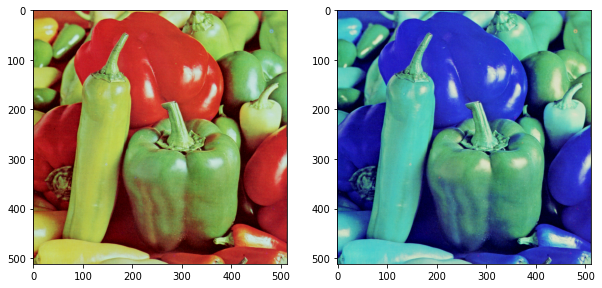

True

In [10]:
red_image_1, green_image_1, blue_image_1 = cv.split(image_1)
swapped_image_1 = cv.merge((blue_image_1, green_image_1, red_image_1))

fig, axs = plt.subplots(ncols=2, figsize=(10, 10), facecolor="white")
axs[0].imshow(image_1)
axs[1].imshow(swapped_image_1)
plt.show()

cv.imwrite("output/ps0-2-a-1.png", cv.cvtColor(swapped_image_1, cv.COLOR_RGB2BGR))


### b) Create a monochrome image (img1_green) by selecting the green channel of image 1
Output: ps0-2-b-1.

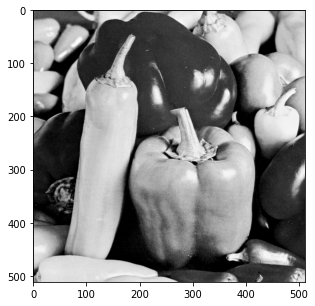

True

In [32]:
green_image = image_1[:, :, 1]

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(green_image, cmap='gray')
plt.show()

cv.imwrite("output/ps0-2-b-1.png", green_image)

### c) Create a monochrome image (img1_red) by selecting the red channel of image 1
Output: ps0-2-c-1.png

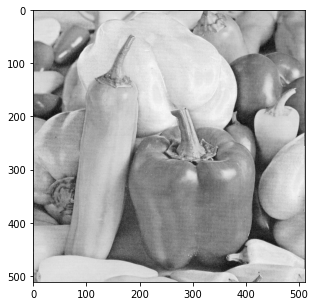

True

In [33]:
red_image = image_1[:, :, 0]

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(red_image, cmap='gray')
plt.show()

cv.imwrite("output/ps0-2-c-1.png", red_image)

### d) Which looks more like what you’d expect a monochrome image to look like? Would you expect a computer vision algorithm to work on one better than the other?
The green channel looks better, because there is a clear difference between pepper and tomato. When we use the
red channel, this difference is no longer that clear.

## Question 3 - Replacement of pixels
(Note: For this, use the better channel from 2-b/2-c as monochrome versions.)

### Take the inner center square region of 100x100 pixels of monochrome version of image 1 and insert them into the center of monochrome version of image 2
Output: Store the new image created as ps0-3-a-1.png